In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rcParams.update({'font.size':18})

In [2]:
simulation_data = np.genfromtxt('../../../csv/BA_results_10_000.csv', delimiter=',')

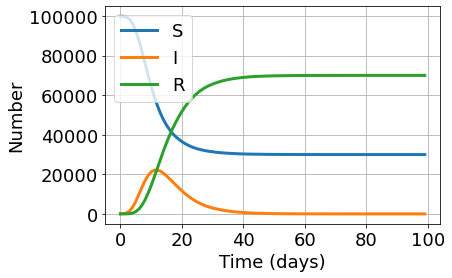

In [3]:
plt.Figure(figsize=(10,7))
plt.plot(simulation_data,label =['S', 'I', 'R'], linewidth = 3)
# plt.xlim([0,100])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
plt.savefig('../../../figures/random_graph_model_figs/SIR_random_graph_0.1_0.1.png', bbox_inches = 'tight')
plt.show()

In [5]:
with open('../../../csv/BA_results_infections_SIRS_0.01.json', 'r') as file:
    infections = json.load(file)
# print(infections)

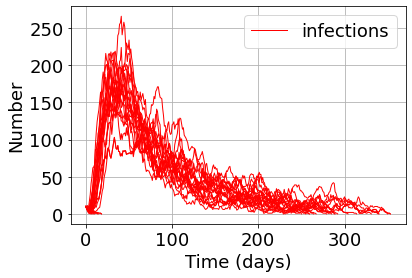

In [6]:
plt.Figure(figsize=(10,7))
for i in range(len(infections['infections'])-1):
    plt.plot(infections['infections'][i],'r', linewidth = 1)
plt.plot(infections['infections'][i],'r', linewidth = 1, label = 'infections')
# plt.xlim([0,350])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
# plt.savefig('../../../figures/random_graph_model_figs/infections_random_graph_0.01_5.png', bbox_inches = 'tight')
plt.show()
# 35 seconds